## Fixed-Horizon Method

사실상 금융 머신러닝의 모든 학술 연구는 fixed-horizon labeling방법을 사용한다. index $t = 1,\dots, T$인 일련의 bar에서 샘플링한 $I$행의 특성 행렬 $X, \{X_i\}_{i=1, \dots, I}$를 고려하자. 여기서 $I \leq T$이다. 기간 $h$에 대한 가격 수익률을 다음과 같이 계산한다.

$$r_{t_{t,0}, t_{i,1}} = \frac{p_{t_{i,1}}}{p_{t_{i,0}}} - 1$$

여기서 $t_{i,0}$은 $i$번째 관측 특성과 연관된 바의 인덱스이고, $t_{i,1} = t_{i,0} + h$는 고정 기간 $h$가 경과한 후의 바 인덱스이다. 이 방법은 다음과 같이 label $y_i = \{-1,0,1\}$을 관측값 $X_i$에 할당한다.

$$
y_i = \begin{cases}
-1 & \text{  if   } r_{t_{i,0}, t_{i,1}} < -\tau, \\ 
0 & \text{  if   } |r_{t_{i,0}, t_{i,1}}| \leq \tau, \\ 
1 & \text{  if   } r_{t_{i,0}, t_{i,1}} > \tau \\ 
\end{cases}
$$

여기서 $\tau$는 미리 정의된 상수 임계값이다. 바가 정기적인 시간별 빈도로 샘플링되는 경우 time bar로 알려져 있다. time bar는 또한 금융 문헌에서도 매우 인기가 있다. fixed time labeling과 time bar를 결합하는 fixed-time horizontal period가 나온다.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start_date = '2000-01-01'
ticker = 'AAPL'
data = yf.download(
    ticker, 
    start = start_date, 
    auto_adjust = True,
    progress = False,
    multi_level_index = False
)

In [2]:
ret = data['Close'].pct_change(fill_method = None).dropna()

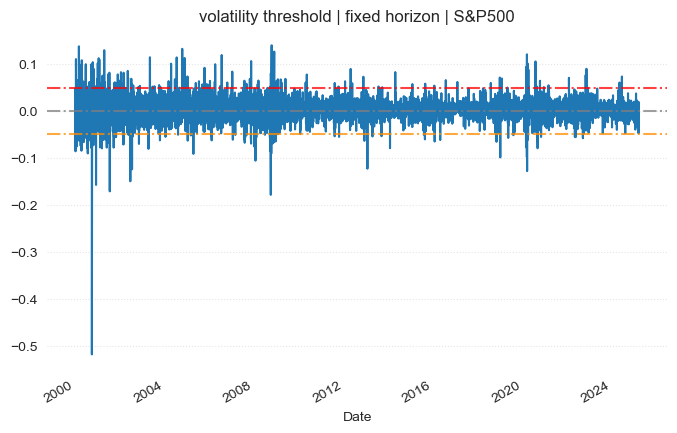

In [4]:
fig, ax = plt.subplots(figsize = (8, 5))
ret.plot(grid = False, ax = ax)

ax.axhline(y = ret.std() * 2, color = 'red', linestyle = '-.', alpha = 0.75)
ax.axhline(y = 0, color = 'gray', linestyle = '-.', alpha = 0.75)
ax.axhline(y = -ret.std() * 2, color = 'darkorange', linestyle = '-.', alpha = 0.75)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('volatility threshold | fixed horizon | S&P500')
plt.show()

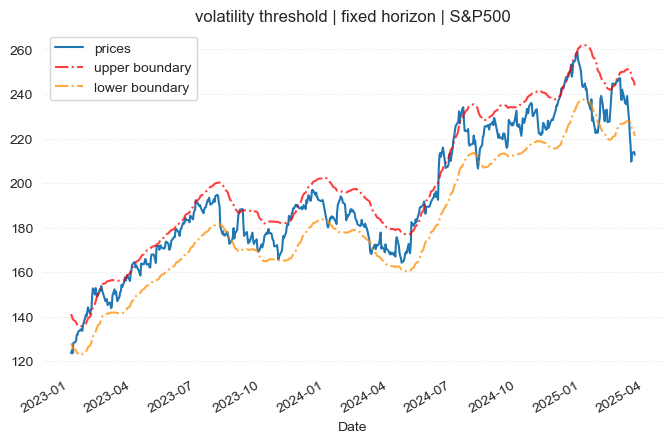

In [5]:
fig, ax = plt.subplots(figsize = (8, 5))

data['Close']['2023':].plot(grid = False, label = 'prices', ax = ax)
ax.plot(
    data['Close'].rolling(window = 20).mean()['2023':] + ret.std() * data['Close'].rolling(window = 20).mean()['2023':] * 2, 
    color = 'red', 
    linestyle = '-.', 
    alpha = 0.75,
    label = 'upper boundary'
)
ax.plot(
    data['Close'].rolling(window = 20).mean()['2023':] - ret.std() * data['Close'].rolling(window = 20).mean()['2023':] * 2, 
    color = 'darkorange', 
    linestyle = '-.', 
    alpha = 0.75,
    label = 'lower boundary'
)
plt.legend()
for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('volatility threshold | fixed horizon | S&P500')
plt.show()